# Visual Analytics
ΦΛΩΡΑ ΦΥΚΑ

In [1]:
import pandas as pd
import numpy as np
import MyLib as mylib
import matplotlib.pyplot as plt

## Step 1: Explore the structure of the data:

### Download and load the CSV dataset into a Pandas data frame 

In [2]:
df = pd.read_csv('Data/owid-energy-data.csv')

### Explore columns, number of rows and datatypes 

In [3]:
mylib.Find_Columns_and_their_DataTypes(df)

DataFrame Sample:
         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share

### Compute statistics about its numeric columns, e.g. mean, sum, and range of values it contains 

In [4]:
numeric_stats = mylib.DataFrame_Stats(df)
print(numeric_stats)

               year    population           gdp  biofuel_cons_change_pct  \
count  21590.000000  1.822400e+04  1.113800e+04              1747.000000   
mean    1973.675498  1.049096e+08  3.578413e+11                46.091694   
std       35.155113  4.628010e+08  2.408514e+12               274.616745   
min     1900.000000  1.833000e+03  1.642060e+08              -100.000000   
25%     1945.000000  1.726186e+06  1.368156e+10                -0.616500   
50%     1983.000000  6.990115e+06  4.174163e+10                 8.179000   
75%     2003.000000  2.558270e+07  1.741312e+11                26.508500   
max     2022.000000  7.975105e+09  1.136300e+14              5659.328000   
Sum             NaN  1.911873e+12  3.985636e+15             80522.189000   
Range           NaN  7.975103e+09  1.136298e+14              5759.328000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count              2687.000000              2302.000000          2767.000000   
mea

## Step 2: Prepare the data:

### Keep only the data for the EU countries and the pre-aggregated data for the EU

In [5]:
EU_df = mylib.EU_Data(df)
print(EU_df)

       country  year iso_code  population           gdp  \
1718   Austria  1900      AUT   5979176.0  2.743996e+10   
1719   Austria  1901      AUT   6040557.0  2.754978e+10   
1720   Austria  1902      AUT   6102565.0  2.862871e+10   
1721   Austria  1903      AUT   6165207.0  2.889683e+10   
1722   Austria  1904      AUT   6228492.0  2.934634e+10   
...        ...   ...      ...         ...           ...   
18322   Sweden  2018      SWE  10162300.0  4.634070e+11   
18323   Sweden  2019      SWE  10267922.0           NaN   
18324   Sweden  2020      SWE  10368968.0           NaN   
18325   Sweden  2021      SWE  10467095.0           NaN   
18326   Sweden  2022      SWE  10549349.0           NaN   

       biofuel_cons_change_pct  biofuel_cons_change_twh  \
1718                       NaN                      NaN   
1719                       NaN                      NaN   
1720                       NaN                      NaN   
1721                       NaN                      NaN

### Perform any additional steps that might help you in your analysis later (create new variables, handle missing values etc.) 

Based on the analysis I will need to do, the columns I need to keep are electricity related to energy columns. 

In [6]:
electricityRelated_columns = ['country', 'year', 'iso_code', 'population', 'gdp','biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'low_carbon_electricity', 'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity', 'wind_electricity']

EU_Electricity_df = mylib.electricityRelated(EU_df, electricityRelated_columns)

#print(EU_Electricity_df.columns.tolist())
#EU_Electricity_df.to_csv('EU_Electricity_df.csv', index=False)


After examining the produced dataframe, I sorted the data by year, revealing a significant number of null or empty entries prior to 1964. Consequently, these were filtered out. While data availability improves from 1964 to 1990, the intensity remains poor. So, starting the analysis from 1990 ensures more accurate results due to the availability of abundant data.

In [7]:
EU_Electricity_df = EU_Electricity_df[df['year'] >= 1990]

#print(EU_Electricity_df)
#EU_Electricity_df.to_csv('EU_Electricity_df3.csv', index=False)

C:\Users\flfy9\AppData\Local\Temp\ipykernel_17888\2680498429.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  EU_Electricity_df = EU_Electricity_df[df['year'] >= 1990]


Finally I check for null values. 

In [8]:
# Display the counts
print(EU_Electricity_df.isnull().sum())

country                                      0
year                                         0
iso_code                                     0
population                                   0
gdp                                        100
biofuel_electricity                          0
coal_electricity                             0
fossil_electricity                           0
gas_electricity                              0
hydro_electricity                            0
low_carbon_electricity                       0
nuclear_electricity                          0
oil_electricity                              0
other_renewable_electricity                  0
other_renewable_exc_biofuel_electricity      0
renewables_electricity                       0
solar_electricity                            0
wind_electricity                             0
dtype: int64


I won't use the 'gdp', so I remove this one too. 

In [9]:
EU_Electricity_df = EU_Electricity_df.drop('gdp', axis=1)
print(EU_Electricity_df.isnull().sum())

country                                    0
year                                       0
iso_code                                   0
population                                 0
biofuel_electricity                        0
coal_electricity                           0
fossil_electricity                         0
gas_electricity                            0
hydro_electricity                          0
low_carbon_electricity                     0
nuclear_electricity                        0
oil_electricity                            0
other_renewable_electricity                0
other_renewable_exc_biofuel_electricity    0
renewables_electricity                     0
solar_electricity                          0
wind_electricity                           0
dtype: int64


## Step 3: Perform exploratory analysis & visualization: 



#### Explore Trends Over Time and Comparative Analysis: 

We can analyze how the usage of renewable energy sources has evolved over the years. By creating time series data plots for each renewable energy source, we can identify trends and seasonal patterns. I chose the following 3 types to examine:

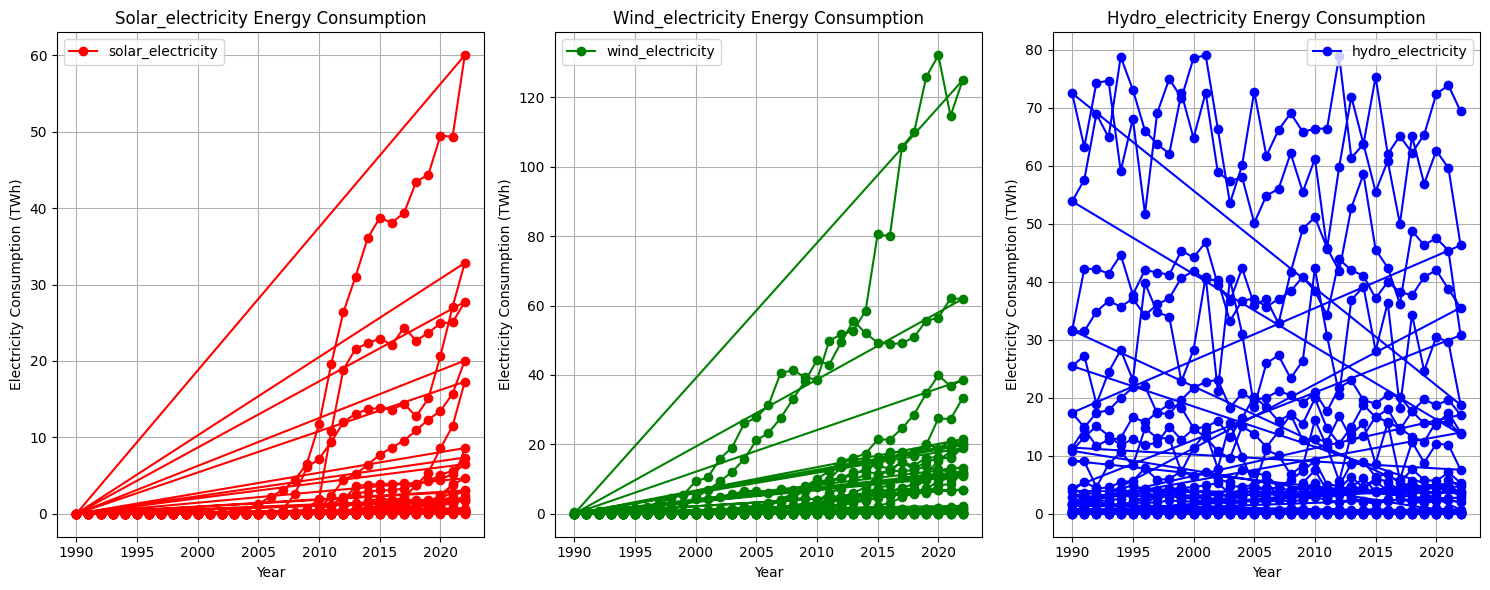

In [10]:
renewable_sources = ['solar_electricity', 'wind_electricity', 'hydro_electricity']
mylib.plot_energy_time_series(EU_Electricity_df, renewable_sources, ['red', 'green', 'blue'])


As years advance, the consumption and therefore utilization of renewable energy sources increases. However, the status of hydroelectricity remains somewhat unclear.
It would be interesting to check if some of the most well-known non-renewable energy sources are decreasing while others are increasing.

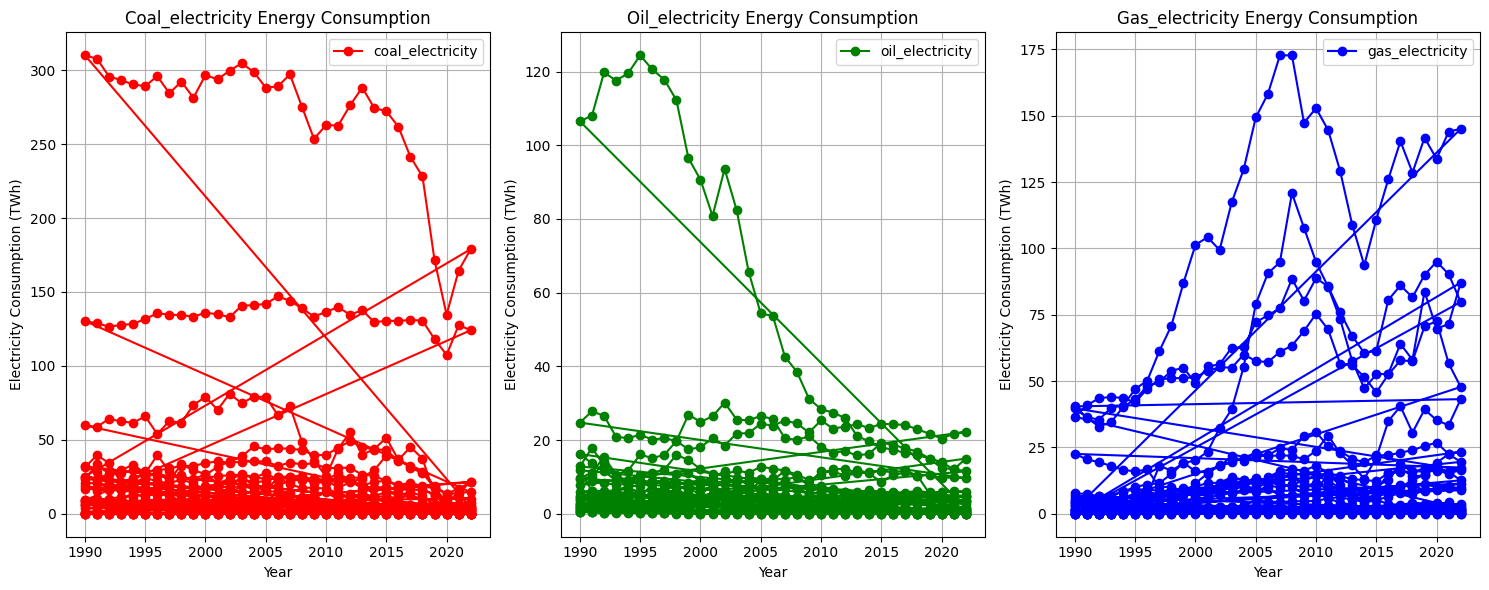

In [11]:
non_renewable_sources = ['coal_electricity', 'oil_electricity', 'gas_electricity']
mylib.plot_energy_time_series(EU_Electricity_df, non_renewable_sources, ['red', 'green', 'blue'])

We can observe that coal and oil are decreasing, while gas appears to have fluctuations but overall shows an increasing trend.

#### Geographical Analysis:
 
On the following plot, an html is exported where covering over the cities we can see which resource of energy the use they consume the most.

Note: I have asked chatgpt to give me info for the libraries I used on this part. I also asked for an example and then I used the example as a reference. 
 

In [12]:
import folium
from geopy.geocoders import Nominatim
import pycountry

# Filter for the specific year, 2022
specific_year = 2022
df_year = EU_Electricity_df[EU_Electricity_df['year'] == specific_year]

# Identify the electricity-related columns
electricity_columns = [
    'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 
    'gas_electricity', 'hydro_electricity', 'low_carbon_electricity', 
    'nuclear_electricity', 'oil_electricity', 'other_renewable_electricity', 
    'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 
    'solar_electricity', 'wind_electricity'
]

# Determine the most consumed electricity type for each country
df_year['Most_Consumed_Electricity'] = df_year[electricity_columns].idxmax(axis=1)

# Initialize geolocator
geolocator = Nominatim(user_agent="CDS-assignment")

# Function to get latitude and longitude from ISO code
def get_lat_long_from_iso(iso_code):
    try:
        country = pycountry.countries.get(alpha_3=iso_code)
        location = geolocator.geocode(country.name)
        return location.latitude, location.longitude
    except:
        return None

# Apply function to DataFrame
df_year['Coordinates'] = df_year['iso_code'].apply(get_lat_long_from_iso)

# Initialize the map
map = folium.Map(location=[20, 0], zoom_start=2)

# Add markers to the map
for i, row in df_year.iterrows():
    if row['Coordinates'] is not None:
        lat, long = row['Coordinates']
        popup_text = f"Country: {row['country']}<br>Year: {row['year']}<br>Most Consumed Electricity: {row['Most_Consumed_Electricity']}"
        folium.Marker(location=[lat, long], popup=popup_text).add_to(map)

# Save the map to an HTML file and display it inline
map.save('country_electricity_map.html')
map

C:\Users\flfy9\AppData\Local\Temp\ipykernel_17888\106988333.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['Most_Consumed_Electricity'] = df_year[electricity_columns].idxmax(axis=1)
C:\Users\flfy9\AppData\Local\Temp\ipykernel_17888\106988333.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['Coordinates'] = df_year['iso_code'].apply(get_lat_long_from_iso)


Based on the previous graph, it's evident that Scandinavian countries appear to utilize low-carbon electricity the most. Therefore, it would be interesting to examine the transition points between different electricity sources, focusing on a specific country such as Denmark.

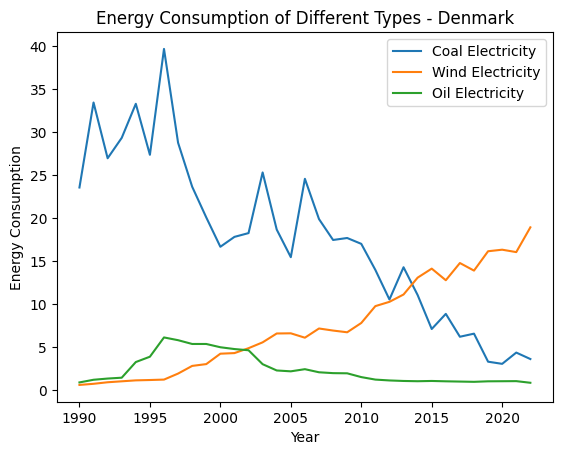

In [13]:
import matplotlib.pyplot as plt

denmark_df = EU_Electricity_df[EU_Electricity_df['country'] == 'Denmark']

plt.plot(denmark_df['year'], denmark_df['coal_electricity'], label='Coal Electricity')
plt.plot(denmark_df['year'], denmark_df['wind_electricity'], label='Wind Electricity')
plt.plot(denmark_df['year'], denmark_df['oil_electricity'], label='Oil Electricity')

plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption of Different Types - Denmark')
plt.legend()

plt.show()

We can clearly observe a transition between 2010 and 2015, during which Denmark shifted from coal usage to an alternative source like wind power. Furthermore, examining the subsequent graph provides a comprehensive overview of Denmark's energy consumption over the years, revealing its predominant reliance on low-carbon electricity sources

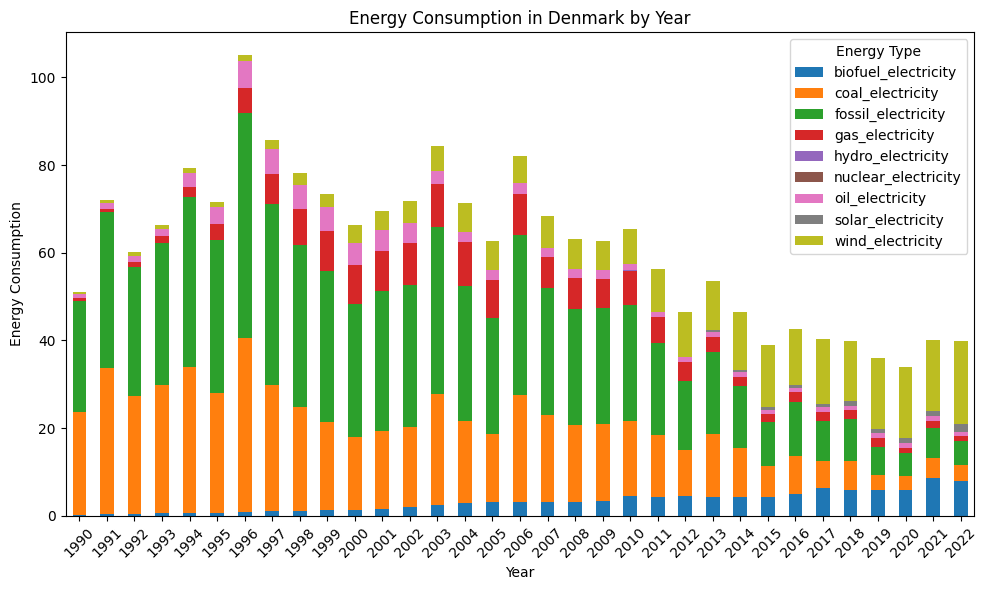

In [14]:
energy_types = ['biofuel_electricity', 'coal_electricity', 'fossil_electricity', 
                'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 
                'oil_electricity', 'solar_electricity', 'wind_electricity']

denmark_df = EU_Electricity_df[EU_Electricity_df['country'] == 'Denmark']

denmark_yearly_energy = denmark_df.groupby('year')[energy_types].sum()

denmark_yearly_energy.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Energy Consumption in Denmark by Year')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.legend(title='Energy Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()